### Importing Libraries

In [1]:
# Importing the necessary libraries
import numpy as np
from IPython.display import Image, display
import cv2
from google.colab.patches import cv2_imshow

### Image Preprocessing

(220, 220, 3)


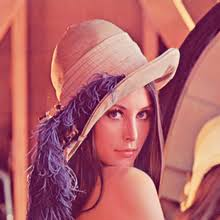


 (220, 220)


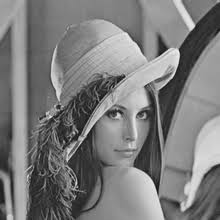


 (256, 256)


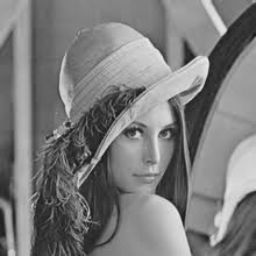

In [2]:
# Loading the image
img=cv2.imread('/content/drive/My Drive/Visual Cryptography/Test Images/lena.jpg')
print(img.shape)
cv2_imshow(img)

# RGB to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('\n',img.shape)
cv2_imshow(img)

# Resizing
img=cv2.resize(img,(256,256))
print('\n',img.shape)
cv2_imshow(img)

# print(img)

### Cryptography for Gray-scale Images Using Bit-level

In [3]:
# Variable Declaration

# VCB: All blocks used in visual cryptography
VCB=np.array([np.array([[1,0],[0,1]]),np.array([[0,0],[1,1]]),np.array([[0,1],[0,1]]),np.array([[1,1],[0,0]]),np.array([[1,0],[1,0]]),np.array([[0,1],[1,0]])])
VCB_comp=np.array([np.array([[0,1],[1,0]]),np.array([[1,1],[0,0]]),np.array([[1,0],[1,0]]),np.array([[0,0],[1,1]]),np.array([[0,1],[0,1]]),np.array([[1,0],[0,1]])])

# Grayscale shares S1 and S2 for each of the eight bit planes
S1=np.array([np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int)])
S2=np.array([np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int),np.zeros((512,512),int)])

# Values for checking if a bit is 1 or 0 
bit_check=[0b1,0b10,0b100,0b1000,0b10000,0b100000,0b1000000,0b10000000]

# To store the actual two shares after combining the eight bit planes
share1=np.zeros((512,512),int)
share2=np.zeros((512,512),int)

# Result after recomposing share1 and share2
R=np.zeros((512,512),int)

In [4]:
# Algorithm
for i in range(256):
  for j in range(256):
    for b in range(8):
      
      # Randomly choosing a 2x2 block from VCB
      index=np.random.randint(0,5)
      B=VCB[index]
      B_comp=VCB_comp[index]

      # If pixel is white (bit is 1), share1 and share2 will be same
      if img[i][j]&bit_check[b]==bit_check[b]:
        S1[b][2*i][2*j]=B[0][0]
        S1[b][2*i][2*j+1]=B[0][1]
        S1[b][2*i+1][2*j]=B[1][0]
        S1[b][2*i+1][2*j+1]=B[1][1]
        S2[b][2*i][2*j]=B[0][0]
        S2[b][2*i][2*j+1]=B[0][1]
        S2[b][2*i+1][2*j]=B[1][0]
        S2[b][2*i+1][2*j+1]=B[1][1]
      
      # If pixel is black (bit is 0), share2 will be complement of share1
      else:
        S1[b][2*i][2*j]=B[0][0]
        S1[b][2*i][2*j+1]=B[0][1]
        S1[b][2*i+1][2*j]=B[1][0]
        S1[b][2*i+1][2*j+1]=B[1][1]
        S2[b][2*i][2*j]=B_comp[0][0]
        S2[b][2*i][2*j+1]=B_comp[0][1]
        S2[b][2*i+1][2*j]=B_comp[1][0]
        S2[b][2*i+1][2*j+1]=B_comp[1][1]

In [5]:
# Combining the eight bit planes to get resultant shares respectively
for i in range(512):
  for j in range(512):
    for b in range(7,-1,-1):
      share1[i][j]=share1[i][j]*10+S1[b][i][j]
      share2[i][j]=share2[i][j]*10+S2[b][i][j]
    
    # Binary to integer
    share1[i][j]=int(str(share1[i][j]),2)
    share2[i][j]=int(str(share2[i][j]),2)

(512, 512)


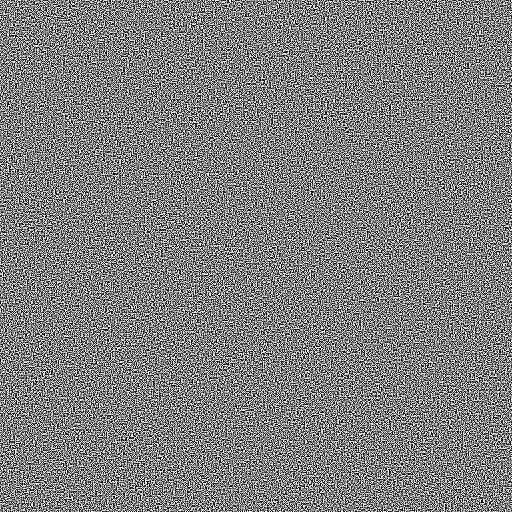


 (512, 512)


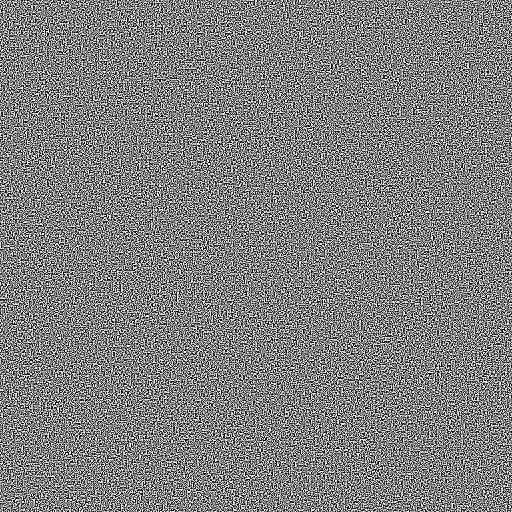

In [6]:
# Displaying Share1 and Share2
print(share1.shape)
cv2_imshow(share1)
print('\n',share2.shape)
cv2_imshow(share2)

(512, 512)


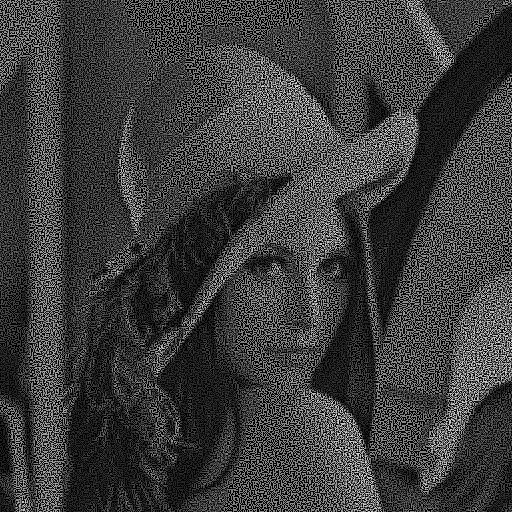


 (256, 256)


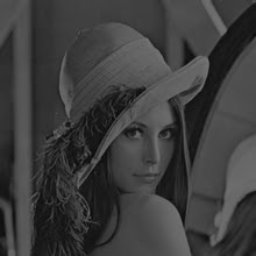

In [7]:
# Superposing the two encrypted shares and displaying the retrieved image
R=np.zeros((512,512),int)
R=share1&share2
print(R.shape)
cv2_imshow(R)

# Resizing
R = R.astype(float)
R=cv2.resize(R,(256,256))
print('\n',R.shape)
cv2_imshow(R)